#Understanding the CIFAR Data

For a more general image recognition challenge, you will need a more general dataset, such as CIFAR that has labeled images for ten different things.

Important information about the CIFAR dataset.

*   Image Size: Each image is 32 x 32 pixels
*   Amount of Images: 50,000 training and 10,000 test images
*   Amount of output classes: there are 10 possible output classes in this dataset
*    Colors: there are three color channels in these images, one for red, green, and blue.

##Preparing the Data



In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


In [48]:
# Variables to keep track of image size
img_rows = 32
img_cols = 32


In [49]:
# The number of posssible output classes in this dataset
num_classes = 10

In [50]:
# The names of each output class.
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [51]:
# Code to load in the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Code to load a backup copy of the data
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()

In [52]:
#Convert the label arrays.
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

In [53]:
# Print out the shape of the datasets, make sure it matches expectations
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [54]:
# Create input shape variable
input_shape = (img_rows, img_cols, 3)

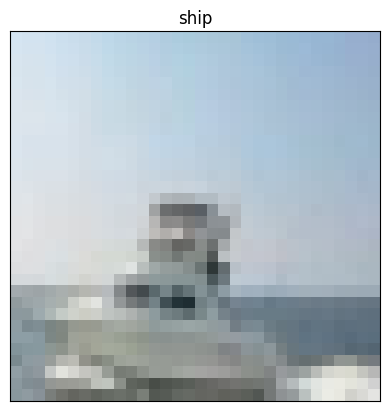

In [55]:
# Show the 100th image using plot_image to make sure data loaded properly
plot_image(train_images, 100, train_labels_backup)

In [56]:
# Show the min and max value of the 100th image
show_min_max(train_images, 100)

min and max value in image:  30 242


In [57]:
# Reformat the data to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


In [58]:
# Normalize values
train_images /= 255
test_images /= 255

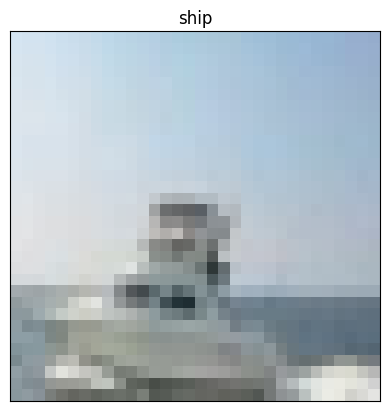

min and max value in image:  0.11764706 0.9490196


In [59]:
# Show the 100th image and it's min and max to make sure the normalization process worked properly
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

In [60]:
# Convert to one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


#Building a Network for CIFAR

Now that the data is prepared it is ready to feed into a network. Since this data is relatively complicated, it makes sense to use another convolutional network.

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [62]:
epochs = 10
batch_size = 64

model = Sequential()

##Adding Convolutional Layers


In [63]:
# Add a Conv2D layer with 32 filters, kernel_size of (3,3) activation of 'relu' and input_shape
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a Conv2D layer with 64 filters, kernel_size of (3,3) activation of 'relu'
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a pooling layer with a pool size of (2,2)
model.add(MaxPooling2D((2, 2)))

# Add a dropout layer with a rate of 0.2
model.add(Dropout(0.2))


####Batch Normalization


In [64]:
model.add(BatchNormalization())

##Adding More Layers



In [65]:
# Add a convolutional layer with 64 filters, kernel size of (3,3) and an activation of 'relu'
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer of pool size (1,1)
model.add(MaxPooling2D((1, 1)))

# Add a dropout layer with rate 0.3
model.add(Dropout(0.3))

# Add a batch normalization layer
model.add(BatchNormalization())


##The Final Stage of Layers

Add another set of layers.


In [66]:
# Add a convolutional layer with 128 filters, kernel size of (3,3) and an activation of 'relu'
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a convolutional layer with 64 filters, kernel size of (3,3) and an activation of 'relu'
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer of pool size (1,1)
model.add(MaxPooling2D((1, 1)))

# Add a dropout layer with rate 0.3
model.add(Dropout(0.3))

# Add a batch normalization layer
model.add(BatchNormalization())


##The Output Layers

Now it's time to prepare the data for the output. Add some layers to organize the information that the network has and reshape it into the decision layer.



In [67]:
# Add a flatten layer
model.add(Flatten())

# Add a dense layer with 128 units and activation of 'relu'
model.add(Dense(128, activation='relu'))

# Add a dense output layer with the same number of units as there are classes and an activation of 'softmax'
model.add(Dense(10, activation='softmax'))

# Print out the summary of the network
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_6 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)       

#Compiling and Training the Model

Now that we have the network, it is time to compile and train it.



In [ ]:
# Compile the network using categorical crossentropy, the adam optimizer, and the metrics of 'accuracy'
model.compile(optimizer = Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model using the training images and labels, the batch size and epochs you set up earlier, validation data, and set shuffle to True
history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=10,
                    validation_data=(test_images, test_labels),
                    shuffle=True)

# Save the scores using the evaluate function and test data
scores = model.evaluate(test_images, test_labels, verbose=0)

# Print out the test accuracy
print(f'Test accuracy: {scores[1] * 100:.2f}%')


Epoch 1/10
782/782 [==============================] - 377s 428ms/step - loss: 1.5236 - accuracy: 0.4636 - val_loss: 1.3283 - val_accuracy: 0.5195
Epoch 2/10
782/782 [==============================] - 331s 424ms/step - loss: 1.0474 - accuracy: 0.6260 - val_loss: 0.9761 - val_accuracy: 0.6446
Epoch 3/10
449/782 [================>.............] - ETA: 2:16 - loss: 0.8821 - accuracy: 0.6902

In [ ]:
#Saving the model
model.save('CIFAR_model.h5')